In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
store_data = pd.read_csv("retail_dataset.csv", header=None,sep=",")
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,Ekmek,Kola,Yumurta,Kiyma,Peynir,Kalem,Bebek Bezi
2,Ekmek,Peynir,Kiyma,Bebek Bezi,Kola,Sut,Kalem
3,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
4,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN


(316, 7)


In [40]:
column_names =(store_data[0].unique())
column_names

array(['0', 'Ekmek', 'Peynir', 'Kiyma', 'Yumurta', 'Kola', 'Makarna',
       'Kalem', 'Bebek Bezi', 'Sut'], dtype=object)

In [41]:
store_data.isnull().sum()

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [42]:
encoded_vals = []
for index, row in store_data.iterrows(): 
    labels = {}
    uncommons = list(set(column_names) - set(row))
    commons = list(set(column_names).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [43]:
ohe_hamveri = pd.DataFrame(encoded_vals)

In [44]:
ohe_hamveri

,Peynir,Sut,Bebek Bezi,Yumurta,Makarna,Ekmek,Kiyma,Kalem,Kola,0
0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,1,0,1,1,1,1,0
2,1,1,1,0,0,1,1,1,1,0
3,1,1,0,1,0,0,1,0,1,0
4,1,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
311,1,0,0,1,0,1,0,0,0,0
312,0,1,0,0,0,0,1,1,0,0
313,1,0,1,1,0,1,1,1,1,0
314,1,0,0,0,0,0,1,0,0,0


In [47]:
ohe_hamveri["Ekmek"][ohe_hamveri["Ekmek"]>0].sum()

159

In [48]:
miktar = ohe_hamveri[column_names][ohe_hamveri[column_names]>0].sum()

In [49]:
miktar = pd.DataFrame(miktar,dtype=int)
miktar.columns=["Miktar"]
miktar

,Miktar
0,1
Ekmek,159
Peynir,158
Kiyma,150
Yumurta,138
Kola,138
Makarna,134
Kalem,114
Bebek Bezi,128
Sut,158


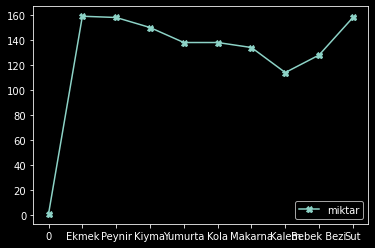

In [50]:
plt.style.use('dark_background')
plt.plot(miktar, label = 'miktar',marker = 'X')
plt.legend()

In [51]:
from mlxtend.frequent_patterns import apriori, association_rules

In [52]:
frekans_degeri = apriori(ohe_hamveri, min_support = 0.2, use_colnames = True, verbose = 1)

Processing 87 combinations | Sampling itemset size 3


C:\Users\mehme\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [53]:
frekans_degeri

,support,itemsets
0,0.500000,(Peynir)
1,0.500000,(Sut)
2,0.405063,(Bebek Bezi)
3,0.436709,(Yumurta)
4,0.424051,(Makarna)
5,0.503165,(Ekmek)
6,0.474684,(Kiyma)
7,0.360759,(Kalem)
8,0.436709,(Kola)
9,0.303797,"(Peynir, Sut)"


In [54]:
frekans_degeri["itemsets"][frekans_degeri["support"]>0.45]

0    (Peynir)
1       (Sut)
5     (Ekmek)
6     (Kiyma)
Name: itemsets, dtype: object

<AxesSubplot:>

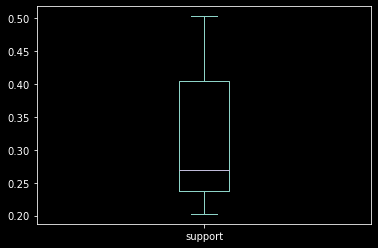

In [55]:
frekans_degeri["support"].plot.box()

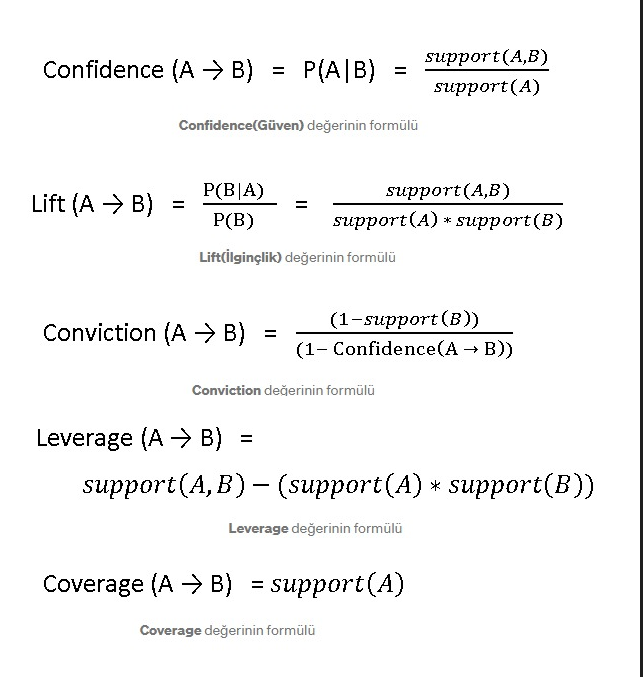

In [57]:
from IPython.display import Image
Image(filename='Ekran Görüntüsü (236).png',width=600, height=400)

In [59]:
solve = association_rules(frekans_degeri, metric = "confidence", min_threshold = 0.6)
solve

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Peynir),(Sut),0.500000,0.500000,0.303797,0.607595,1.215190,0.053797,1.274194
1,(Sut),(Peynir),0.500000,0.500000,0.303797,0.607595,1.215190,0.053797,1.274194
2,(Yumurta),(Peynir),0.436709,0.500000,0.297468,0.681159,1.362319,0.079114,1.568182
3,(Peynir),(Kiyma),0.500000,0.474684,0.322785,0.645570,1.360000,0.085443,1.482143
4,(Kiyma),(Peynir),0.474684,0.500000,0.322785,0.680000,1.360000,0.085443,1.562500
5,(Kola),(Peynir),0.436709,0.500000,0.268987,0.615942,1.231884,0.050633,1.301887
6,(Yumurta),(Kiyma),0.436709,0.474684,0.265823,0.608696,1.282319,0.058524,1.342475
7,(Makarna),(Ekmek),0.424051,0.503165,0.278481,0.656716,1.305172,0.065114,1.447303
8,"(Peynir, Kiyma)",(Sut),0.322785,0.500000,0.202532,0.627451,1.254902,0.041139,1.342105
9,"(Peynir, Sut)",(Kiyma),0.303797,0.474684,0.202532,0.666667,1.404444,0.058324,1.575949


<AxesSubplot:>

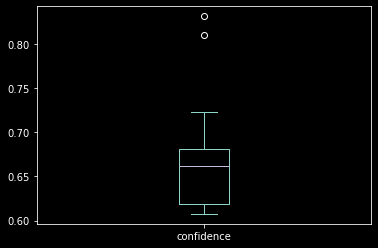

In [60]:
solve["confidence"].plot.box()

In [61]:
solve[solve["confidence"]>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(Sut, Kiyma)",(Peynir),0.243671,0.5,0.202532,0.831169,1.662338,0.080696,2.961538
13,"(Kiyma, Yumurta)",(Peynir),0.265823,0.5,0.215190,0.809524,1.619048,0.082278,2.625000


In [62]:
solve[(solve["confidence"]>0.6) & (solve["support"]>0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Peynir),(Sut),0.500000,0.500000,0.303797,0.607595,1.21519,0.053797,1.274194
1,(Sut),(Peynir),0.500000,0.500000,0.303797,0.607595,1.21519,0.053797,1.274194
3,(Peynir),(Kiyma),0.500000,0.474684,0.322785,0.645570,1.36000,0.085443,1.482143
4,(Kiyma),(Peynir),0.474684,0.500000,0.322785,0.680000,1.36000,0.085443,1.562500
